# Árvores de regressão 

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [19]:
import pandas as pd
import seaborn as sns
import graphviz
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import tree

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()


X = pd.DataFrame(housing.data, columns = housing.feature_names)
y = pd.DataFrame(housing.target, columns = ['MEDV'])

In [20]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [21]:
y.head()

,MEDV
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [22]:
faltantes_X = X.isna().sum()
faltantes_y = y.isna().sum()
print(faltantes_X)
print(faltantes_y)

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64
MEDV    0
dtype: int64


Os valores são todos numericos e também não existem valores faltantes, portanto são aptos a serem utilizados no scikitlearn

### 3. Separe os dados em validação e teste

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [24]:
# Treinamento das arvores
arvore1 = DecisionTreeRegressor(max_depth = 8)
arvore2 = DecisionTreeRegressor(max_depth = 2)

arvore1.fit(X_train, y_train)
arvore2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [25]:
# Para poder realizar o calculo do MSE, primeiro realizo o import da função
from sklearn.metrics import mean_squared_error

# Após trazer a função, faço as previsões das árvores com os dados de treino e teste
# Previsões arvore 1
y_train_pred1 = arvore1.predict(X_train)
y_test_pred1 = arvore1.predict(X_test)

# Previsões arvore 2
y_train_pred2 = arvore2.predict(X_train)
y_test_pred2 = arvore2.predict(X_test)

# Com as previsões realizadas, é possível realizar o MSE da arvore 1
mse_train_arvore1 = mean_squared_error(y_train, y_train_pred1)
mse_test_arvore1 = mean_squared_error(y_test, y_test_pred1)

# Com as previsões realizadas, é possível realizar o MSE da arvore 2
mse_train_arvore2 = mean_squared_error(y_train, y_train_pred2)
mse_test_arvore2 = mean_squared_error(y_test, y_test_pred2)

# Mostrar cada um dos valores de MSE de cada arvore
print("MSE de treinamento da árvore 1:", mse_train_arvore1)
print("MSE de teste da árvore 1:", mse_test_arvore1)
print("MSE de treinamento da árvore 2:", mse_train_arvore2)
print("MSE de teste da árvore 2:",mse_test_arvore2)


MSE de treinamento da árvore 1: 0.301412355008363
MSE de teste da árvore 1: 0.3976418736121347
MSE de treinamento da árvore 2: 0.7440836143901682
MSE de teste da árvore 2: 0.7201514545500403


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

Realizando a observação dos resultados, a árvore mais adequada é a primeiro, que possui um MSE de valor bem menor do que a segunda árvore.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

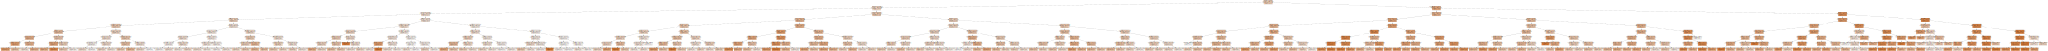

In [26]:
visualisacao_dot = export_graphviz(arvore1, out_file=None, feature_names = X.columns, filled=True)
graph = graphviz.Source(visualisacao_dot, format='png')
graph

Aparentemente a variável mais importante é a "MedInc" pois é a primeira variável que aparena arvore de decisão para ser filtrada e também existe uma recorrência dela nas próximas camadas.